# Example Evaluation Code

This notebook will be very __similar__ to the code I use to evaluate your results - it is provided for __your convenience__ so that you can use it to evaluate your preprocessing results at any time before your __final submission__.

Please note that the results here will __NOT__ be the same as my evaluation results.

Let's start with loading the required packages.

In [2]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression


#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset


In [3]:
data = pd.read_csv('data_imputed_outliers_fixed_skew_zscore.csv')

In [5]:
import pandas as pd
df = pd.read_csv('data_imputed_outliers_fixed_skew_zscore.csv' , usecols =  [ 'div_manufacturing', 'div_other', 'div_services',
       'Y1', 'Y2', 
 
 'C2_Imput', 
 
 
 
      
      
      
 
'C1_Imput_outliner_fix_skew_zscore',
 'C3_Imput_p_skew_zscore',
'C4_Imput_skew_zscore',
 'C5_Imput_p_outliner_fix_skew_zscore',
       'C6_Imput_p_outliner_fix_skew_zscore',
       'C7_Imput_outliner_fix_skew_zscore',
       'T3_Imput_ratio_outliner_fix_skew_zscore',
       'T4_Imput_ratio_outliner_fix_zscore',
       'T5_Imput_ratio_outliner_fix_skew_zscore',
       'S1_Imput_ratio_outliner_fix_skew_zscore',
       'S2_Imput_ratio_outliner_fix_skew_zscore',
       'S3_Imput_ratio_outliner_fix_skew_zscore'])
x = df

X = df.drop(["Y1" ,"Y2"  ],1)   #Feature Matrix
y = df["Y2"]          #Target Variable
len(X.columns)

16

##### X.isna().sum()

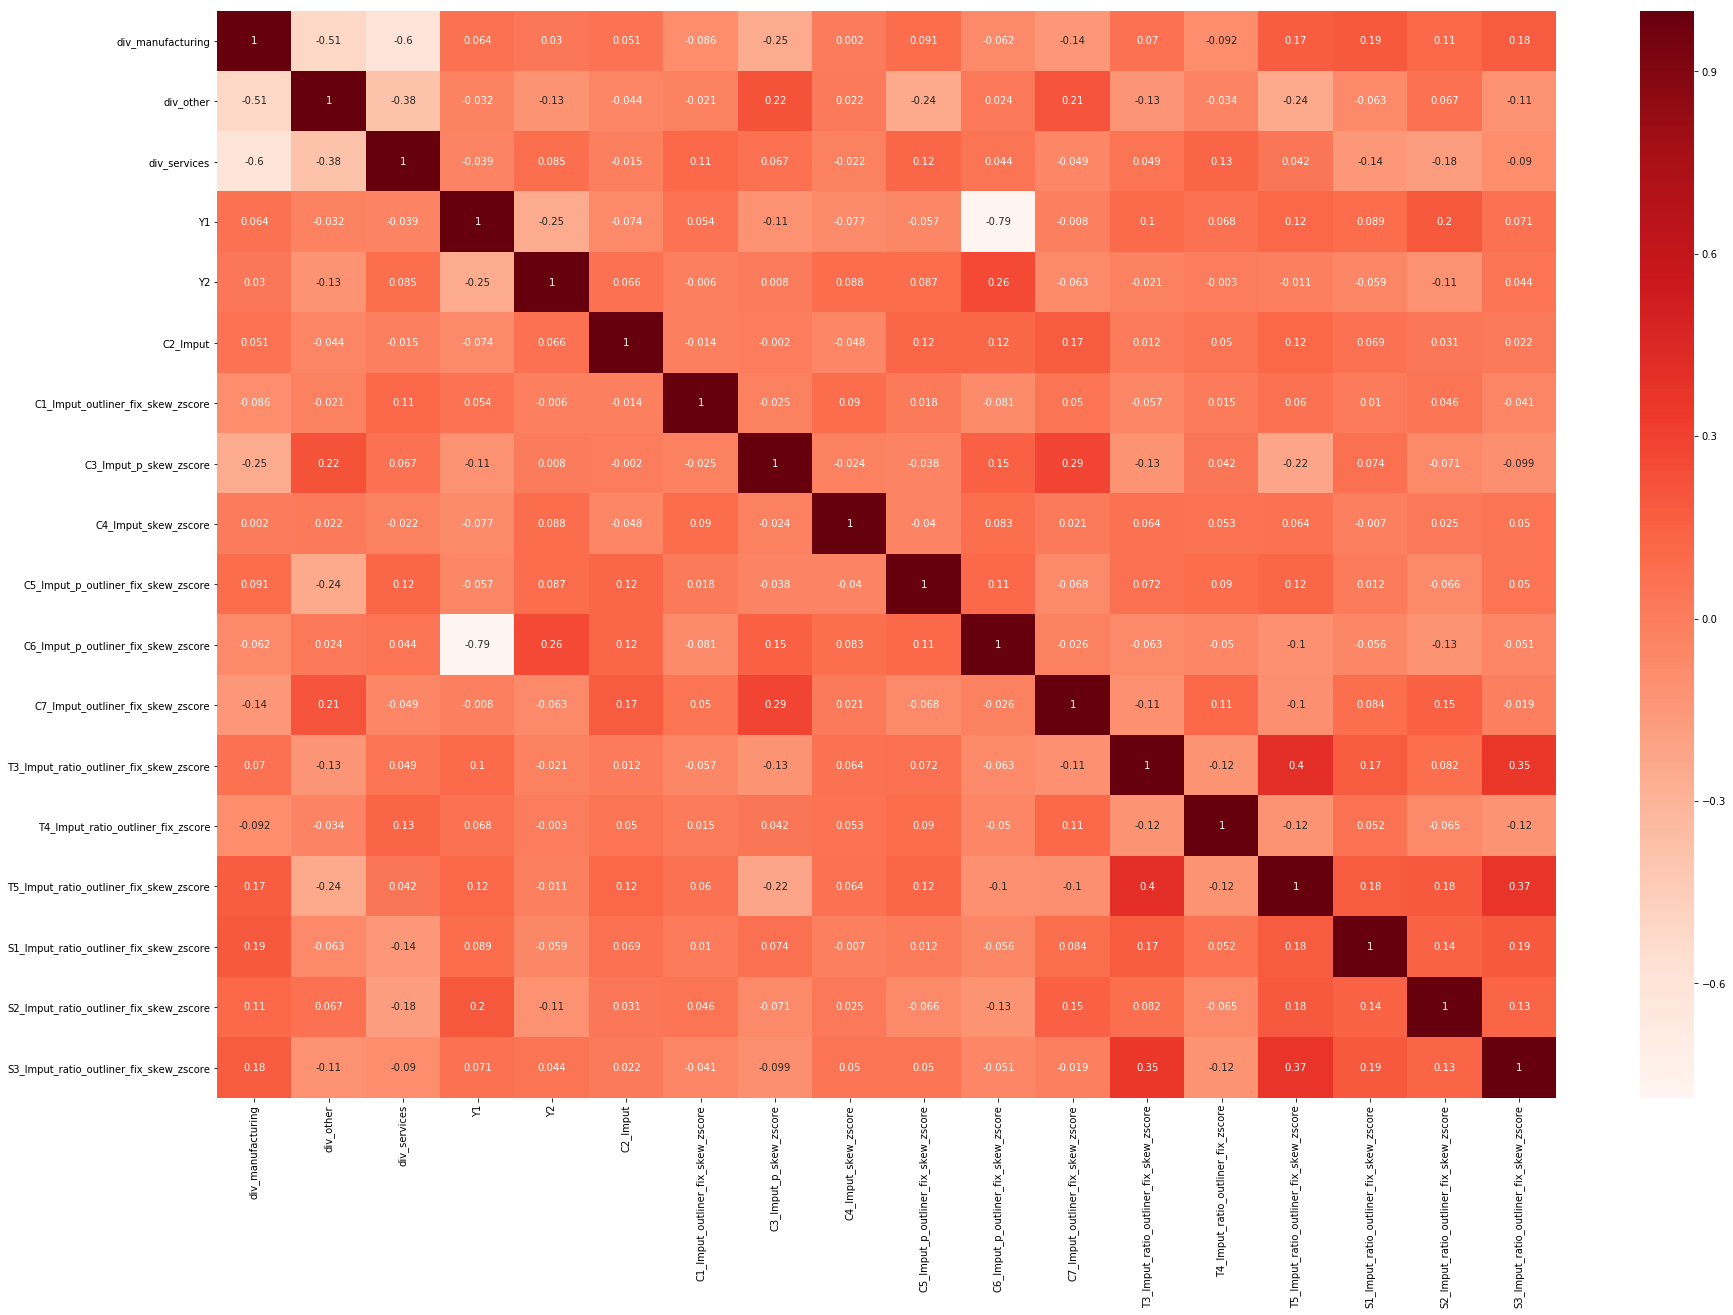

In [6]:

#Using Pearson Correlation
plt.figure(figsize=(30,20))
cor = df.corr().round(3)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
cor_target = abs(cor["Y2"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Y2    1.0
Name: Y2, dtype: float64

In [8]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                                      2.929828e-36
div_manufacturing                          4.035241e-12
div_other                                  2.482388e-02
div_services                               7.743080e-13
C2_Imput                                   2.450276e-01
C1_Imput_outliner_fix_skew_zscore          7.944249e-01
C3_Imput_p_skew_zscore                     9.032646e-01
C4_Imput_skew_zscore                       4.680197e-02
C5_Imput_p_outliner_fix_skew_zscore        5.186155e-01
C6_Imput_p_outliner_fix_skew_zscore        3.197414e-09
C7_Imput_outliner_fix_skew_zscore          4.418176e-01
T3_Imput_ratio_outliner_fix_skew_zscore    3.893768e-01
T4_Imput_ratio_outliner_fix_zscore         9.455495e-01
T5_Imput_ratio_outliner_fix_skew_zscore    5.937278e-01
S1_Imput_ratio_outliner_fix_skew_zscore    2.629131e-01
S2_Imput_ratio_outliner_fix_skew_zscore    9.932160e-02
S3_Imput_ratio_outliner_fix_skew_zscore    6.271561e-02
dtype: float64

In [9]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['div_manufacturing', 'div_other', 'div_services', 'C6_Imput_p_outliner_fix_skew_zscore']


In [10]:
feature_with_p_max

'div_other'

In [82]:
#no of features
nof_list=np.arange(1,300)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 8
Score with 8 features: 0.757576


In [76]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model,)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['div_manufacturing', 'div_other', 'div_services', 'C2_Imput',
       'C4_Imput_skew_zscore', 'C6_Imput_p_outliner_fix_skew_zscore',
       'S1_Imput_ratio_outliner_fix_skew_zscore',
       'S2_Imput_ratio_outliner_fix_skew_zscore',
       'S3_Imput_ratio_outliner_fix_skew_zscore'],
      dtype='object')


Best alpha using built-in LassoCV: 0.011189
Best score using built-in LassoCV: 0.096149
Lasso picked 8 variables and eliminated the other 8 variables


div_other                                 -0.068580
S2_Imput_ratio_outliner_fix_skew_zscore   -0.025580
S1_Imput_ratio_outliner_fix_skew_zscore   -0.010597
C7_Imput_outliner_fix_skew_zscore         -0.003386
div_manufacturing                          0.000000
div_services                               0.000000
C2_Imput                                   0.000000
C1_Imput_outliner_fix_skew_zscore          0.000000
C3_Imput_p_skew_zscore                    -0.000000
T3_Imput_ratio_outliner_fix_skew_zscore   -0.000000
T4_Imput_ratio_outliner_fix_zscore         0.000000
T5_Imput_ratio_outliner_fix_skew_zscore   -0.000000
C5_Imput_p_outliner_fix_skew_zscore        0.008745
S3_Imput_ratio_outliner_fix_skew_zscore    0.014953
C4_Imput_skew_zscore                       0.021503
C6_Imput_p_outliner_fix_skew_zscore        0.103568
dtype: float64

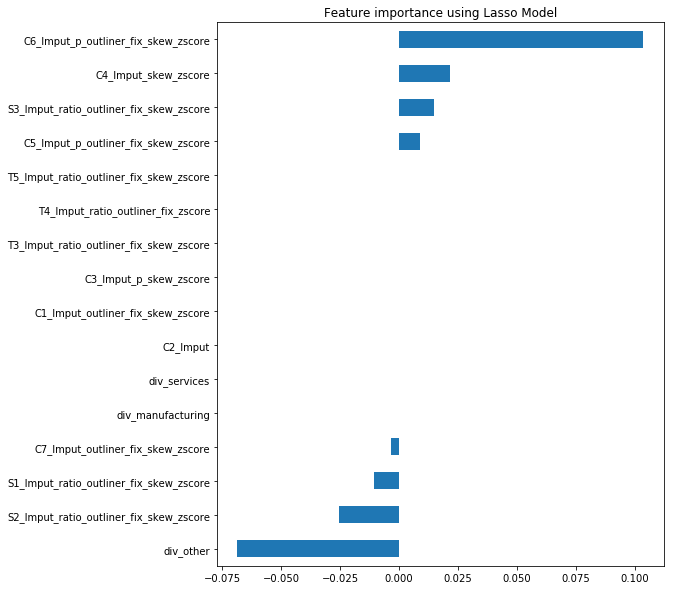

In [93]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
imp_coef


In [77]:
y1 = data.Y1
y2 = data.Y2

In [163]:
t = '''div_other                                 -0.068580
S2_Imput_ratio_outliner_fix_skew_zscore   -0.025580
S1_Imput_ratio_outliner_fix_skew_zscore   -0.010597
C7_Imput_outliner_fix_skew_zscore         -0.003386
div_manufacturing                          0.000000
div_services                               0.000000
C2_Imput                                   0.000000
C1_Imput_outliner_fix_skew_zscore          0.000000
C3_Imput_p_skew_zscore                    -0.000000
T3_Imput_ratio_outliner_fix_skew_zscore   -0.000000
T4_Imput_ratio_outliner_fix_zscore         0.000000
T5_Imput_ratio_outliner_fix_skew_zscore   -0.000000
C5_Imput_p_outliner_fix_skew_zscore        0.008745
S3_Imput_ratio_outliner_fix_skew_zscore    0.014953
C4_Imput_skew_zscore                       0.021503
C6_Imput_p_outliner_fix_skew_zscore        0.103568'''

In [152]:
selected_features_rfe_0 =  ['div_other', 'S2_Imput_ratio_outliner_fix_skew_zscore',
       
       
                                                           
                                                               'T3_Imput_ratio_outliner_fix_skew_zscore',
                                                                'T5_Imput_ratio_outliner_fix_skew_zscore',
                                                              
       
      
                            'C4_Imput_skew_zscore',
       'C6_Imput_p_outliner_fix_skew_zscore']

In [159]:
selected_features_rfe_1 = [   'C6_Imput_p_outliner_fix_skew_zscore', 
        
                                                              
                                                                
                                                            
                                                                'C5_Imput_p_outliner_fix_skew_zscore',
                                                               
                                                                'C7_Imput_outliner_fix_skew_zscore',
                                                              
    
         
                                                                'T3_Imput_ratio_outliner_fix_skew_zscore',
                                                                'T5_Imput_ratio_outliner_fix_skew_zscore',
                                                                
                                                                'S1_Imput_ratio_outliner_fix_skew_zscore',
                                                         
                                                                'S3_Imput_ratio_outliner_fix_skew_zscore']
       

In [160]:
predictors_y2 = data[selected_features_rfe_1[:]]

predictors_y2.head()

,C6_Imput_p_outliner_fix_skew_zscore,C5_Imput_p_outliner_fix_skew_zscore,C7_Imput_outliner_fix_skew_zscore,T3_Imput_ratio_outliner_fix_skew_zscore,T5_Imput_ratio_outliner_fix_skew_zscore,S1_Imput_ratio_outliner_fix_skew_zscore,S3_Imput_ratio_outliner_fix_skew_zscore
0,1.304068,0.074150,-0.638509,0.657541,0.334955,-0.141154,-0.159743
1,-0.787904,0.752026,-0.974205,0.076582,-0.110184,-1.364053,-0.182632
2,-0.787904,-0.285875,-1.446763,0.685749,1.506698,0.740051,0.045025
3,-0.787904,-0.337764,-1.400485,1.159455,1.485825,0.740051,0.872906
4,1.193357,-0.024555,1.329414,-0.466210,-0.553799,-0.389748,-0.016128


In [161]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(predictors_y2, y2)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 7
Selected Features: [ True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1]


In [162]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,20):
    #Model building
    clf1 = LogisticRegression()

    
    
    # Splitting data into testing and training
    X2_train, X2_test, y2_train, y2_test = train_test_split(predictors_y2, y2, test_size=0.2, random_state=123)
    
    # Begin oversampling
    oversample = pd.concat([X2_train,y2_train],axis=1)
    max_size = oversample['Y2'].value_counts().max()
    lst = [oversample]
    for class_index, group in oversample.groupby('Y2'):
        lst.append(group.sample(max_size-len(group), replace=True))
    X2_train = pd.concat(lst)
    y2_train=pd.DataFrame.copy(X2_train['Y2'])
    del X2_train['Y2']
    
    # fitting model on oversampled data
    clf1.fit(X2_train, y2_train)
    
    y2_pred = clf1.predict(X2_test)
    
    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle=True)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf1, X2_train, y2_train, cv=kfold, scoring=scoring)
    
    #calculate f1-score and AUC
    
    clf1_roc_auc = roc_auc_score(y2_test, y2_pred)
    
    
    #calculate average f1-score and AUC
    f1_score_lst.append(precision_recall_fscore_support(y2_test, y2_pred, average='weighted')[2])
    auc_lst.append(clf1_roc_auc)
    
    
print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

confusion_matrix_y2 = confusion_matrix(y2_test, y2_pred)


print('Accuracy of classifier on test set: {:.3f}'.format(clf1.score(X2_test, y2_test)))

print("10-fold cross validation average accuracy of clf1: %.3f" % (results.mean()))

print('Confusion Matrix for Classfier:')
print(confusion_matrix_y2)

print('Classification Report for Classfier:')
print(classification_report(y2_test, y2_pred))


F1 0.6662; AUC 0.6774 
Accuracy of classifier on test set: 0.644
10-fold cross validation average accuracy of clf1: 0.616
Confusion Matrix for Classfier:
[[29  7]
 [40 56]]
Classification Report for Classfier:
              precision    recall  f1-score   support

           0       0.42      0.81      0.55        36
           1       0.89      0.58      0.70        96

    accuracy                           0.64       132
   macro avg       0.65      0.69      0.63       132
weighted avg       0.76      0.64      0.66       132

